In [20]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
%matplotlib inline

In [2]:
cwd = pathlib.Path().cwd()
data_path = cwd/"dataset"/"final_train.csv"
pd.set_option("display.max_rows", None, "display.max_columns", None)
data = pd.read_csv(data_path, index_col=0)

In [3]:
# drop rows
data_d = data.dropna()

In [4]:
def data_to_train_valid(data):
    y = data.loc[:, "Activity"].copy()
    X = data.drop(["Activity", "subject", "void()"], axis=1)
    #simple split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_valid, y_train, y_valid

In [5]:
def encode_y(y_train, y_valid):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_valid = label_encoder.transform(y_valid)
    return y_train, y_valid, label_encoder

## Split data, encode y labels

In [6]:
X_train, X_valid, y_train, y_valid = data_to_train_valid(data)

In [7]:
y_train, y_valid, label_encoder = encode_y(y_train, y_valid)

In [8]:
numerical_columns = list(X_train.columns.values)

In [15]:
numerical_transformer = SimpleImputer(strategy='median')
scaler = StandardScaler()
preproc = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns)
       
    ])

# Neural Networks

## Deep neural network with dropout layers

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow import keras

In [16]:
X_train = preproc.fit_transform(X_train)
X_valid = preproc.transform(X_valid)

In [17]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [40]:
model_params = {"neurons":[64, 32], "dropout":[0.5, 0.3]}
model_params = {"neurons":[128, 64], "dropout":[0.5, 0.5]}

In [41]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1])))
model.add(Dense(model_params["neurons"][0], activation='elu', kernel_initializer="he_normal"))
model.add(Dropout(model_params["dropout"][0]))
model.add(Dense(model_params["neurons"][1], activation='elu', kernel_initializer="he_normal"))
model.add(Dropout(model_params["dropout"][1]))
model.add(Dense(6, activation='softmax'))

In [42]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
278/278 [==============================] - 1s 3ms/step - loss: 1.1904 - accuracy: 0.6675 - val_loss: 0.1887 - val_accuracy: 0.9206
Epoch 2/60
278/278 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.9062 - val_loss: 0.0962 - val_accuracy: 0.9621
Epoch 3/60
278/278 [==============================] - 1s 2ms/step - loss: 0.1827 - accuracy: 0.9376 - val_loss: 0.0831 - val_accuracy: 0.9680
Epoch 4/60
278/278 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9506 - val_loss: 0.0752 - val_accuracy: 0.9711
Epoch 5/60
278/278 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.9575 - val_loss: 0.0748 - val_accuracy: 0.9702
Epoch 6/60
278/278 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9600 - val_loss: 0.1108 - val_accuracy: 0.9522
Epoch 7/60
278/278 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9592 - val_loss: 0.0713 - val_accuracy: 0.9752
Epoch 

278/278 [==============================] - 1s 2ms/step - loss: 0.0249 - accuracy: 0.9914 - val_loss: 0.0683 - val_accuracy: 0.9847
Epoch 59/60
278/278 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9914 - val_loss: 0.0716 - val_accuracy: 0.9811
Epoch 60/60
278/278 [==============================] - 1s 2ms/step - loss: 0.0298 - accuracy: 0.9897 - val_loss: 0.0558 - val_accuracy: 0.9860


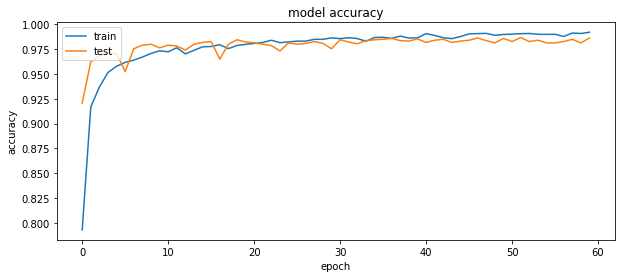

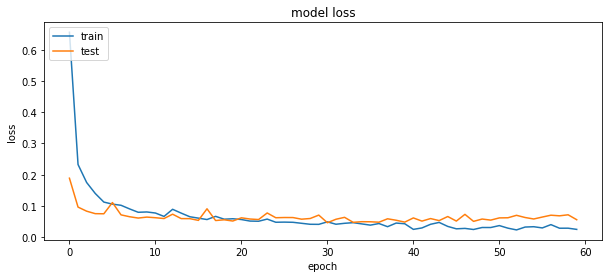

In [44]:
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()